Discretization Sensibility Test
------------------
This exemple consist of demonstrating the methods sensibility to the basepath discretization.
The method is applied with a 10000 basepath points every other: 
* 5
* 10
* 20
* 40
* 80
* 160
* 320
* 640
* 1280
points


In [36]:
import sys
sys.path.append(r'/home/user/.qgis2/python/plugins/AnyForm/')

In [37]:
%matplotlib inline

from anisotroPy import basegrid, basepath, transformation
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division
import numpy as np
import scipy.interpolate
import pandas as pd

In [38]:
reload(basepath)
reload(transformation)

<module 'anisotroPy.transformation' from '/home/user/.qgis2/python/plugins/AnyForm/anisotroPy/transformation.pyc'>

In [39]:
# Make this example reproducible:
np.random.seed(89239413)

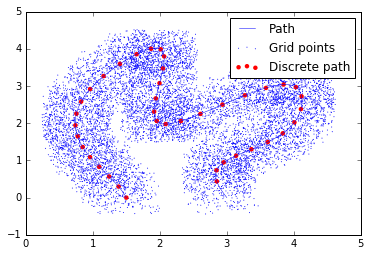

In [55]:

x = np.array([ 1.5,  1.,  1.,  2.,  2.,  4.,  4.,  3., 3.])
y = np.array([ 0.,  1.,  3.,  4.,  2.,  3.,  2.,  1., 0.])

t = np.zeros(x.shape)
t[1:] = np.sqrt((x[1:] - x[:-1])**2 + (y[1:] - y[:-1])**2)
t = np.cumsum(t)
t /= t[-1]
nt = np.linspace(0, 1, 10000)
x1 = scipy.interpolate.spline(t, x, nt)
y1 = scipy.interpolate.spline(t, y, nt)
plt.plot(x1, y1, label='Path',lw=0.5)



random_x = np.random.random(len(x1))
random_y = np.random.random(len(y1))

plt.scatter(x1+random_x-0.5,y1+random_y-0.5,s=1,edgecolors='none', label = 'Grid points')
plt.scatter(x1[::250], y1[::250], label='Discrete path', c = 'r',edgecolors='none')
plt.legend(loc='best')
plt.show()

In [41]:
def execute_transformation(path, grid):
    #   Create basepath object and load data from a dataframe.
    bp  = basepath.Basepath()
    bp.basepath = pd.DataFrame()
    bp.basepath['E'] = zip(*path)[0]
    bp.basepath['N'] = zip(*path)[1]
    #   Calculate the s distances from the origin,
    #   the bc distance between every consecutive points
    #   and the vector between bc
    bp.calculate_s()
    bp.calculate_bc()
    bp.calculate_vbc()
    #   Create basegrid object and load data from a csv file.
    bg  = basegrid.Basegrid()
    bg.basegrid = pd.DataFrame()
    bg.basegrid['E'] = zip(*grid)[0]
    bg.basegrid['N'] = zip(*grid)[1]
    #   Create transformation object, with default configuration
    #   and with the basepath and basegrid objects.
    trg = transformation.Transformation(bp, bg, msp=0.5, st = 0.0001)
    #   Perform the transformation.
    trg.run()
    #   Save the transformed basegrid to a csv file.
    #bg.basegrid.to_csv('bathymetry_out.csv', sep='\s')
    return bg.basegrid

# Discretization: 5 #####################################
Avarage interval between path points:
0.00630222030903
bc calculated successfully
vbc calculated successfully
0:00:00.000021
 calculate_bp
0:00:00.170891
 calculate_vbp
0:00:50.587536
 calculate_pbc
0:01:30.933505
 calculate_pto
0:02:32.984790
 set_index_correlation
0:02:47.575461
 set_pto
0:02:47.977230
 set_position
0:02:55.805749
 set_d
0:03:14.428146
 set_s
0:03:14.691545


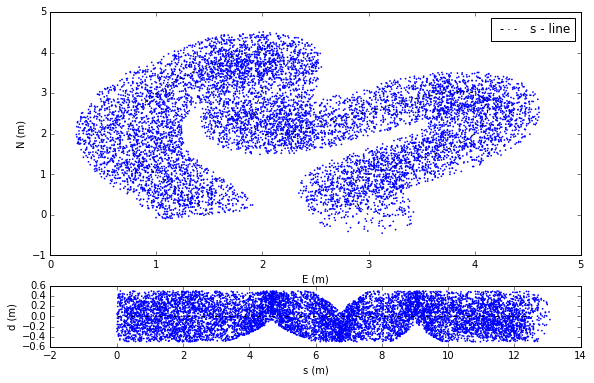

0:03:16.693508
##########################################################
# Discretization: 10 #####################################
Avarage interval between path points:
0.0125930203967
bc calculated successfully
vbc calculated successfully
0:00:00.000022
 calculate_bp
0:00:00.227308
 calculate_vbp
0:00:23.751697
 calculate_pbc
0:00:43.189623
 calculate_pto
0:01:01.433044
 set_index_correlation
0:01:03.982530
 set_pto
0:01:04.052995
 set_position
0:01:05.305682
 set_d
0:01:05.363047
 set_s
0:01:05.495636


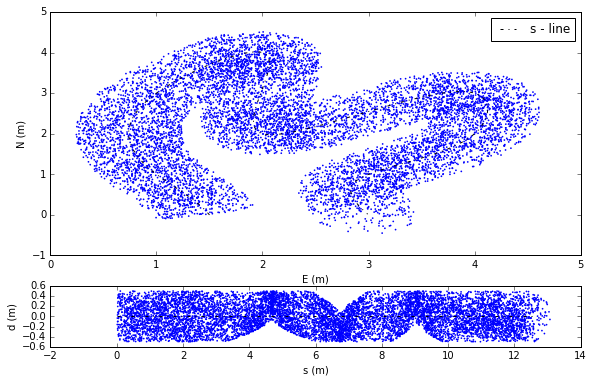

0:01:06.071835
##########################################################
# Discretization: 20 #####################################
Avarage interval between path points:
0.025140677267
bc calculated successfully
vbc calculated successfully
0:00:00.000022
 calculate_bp
0:00:00.086007
 calculate_vbp
0:00:11.612813
 calculate_pbc
0:00:21.658211
 calculate_pto
0:00:30.499611
 set_index_correlation
0:00:31.766315
 set_pto
0:00:31.819826
 set_position
0:00:32.416996
 set_d
0:00:32.463849
 set_s
0:00:32.573285


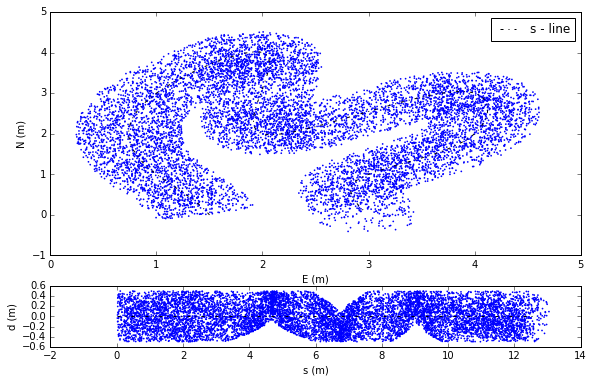

0:00:33.140228
##########################################################
# Discretization: 40 #####################################
Avarage interval between path points:
0.0501023763602
bc calculated successfully
vbc calculated successfully
0:00:00.000017
 calculate_bp
0:00:00.054253
 calculate_vbp
0:00:05.712788
 calculate_pbc
0:00:10.687920
 calculate_pto
0:00:15.294442
 set_index_correlation
0:00:16.245420
 set_pto
0:00:16.300449
 set_position
0:00:16.700436
 set_d
0:00:16.747321
 set_s
0:00:16.853711


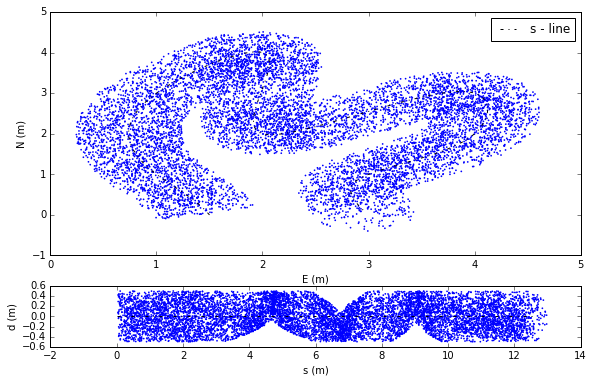

0:00:17.470120
##########################################################
# Discretization: 80 #####################################
Avarage interval between path points:
0.0995076173479
bc calculated successfully
vbc calculated successfully
0:00:00.000025
 calculate_bp
0:00:00.045259
 calculate_vbp
0:00:03.189898
 calculate_pbc
0:00:05.620892
 calculate_pto
0:00:07.773379
 set_index_correlation
0:00:08.488334
 set_pto
0:00:08.543504
 set_position
0:00:08.856994
 set_d
0:00:08.903597
 set_s
0:00:09.005195


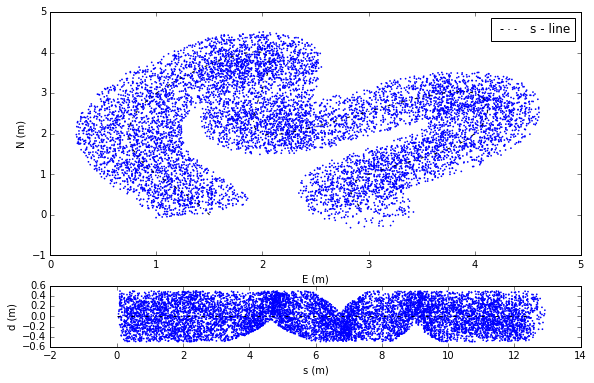

0:00:09.583704
##########################################################
# Discretization: 160 #####################################
Avarage interval between path points:
0.197162475556
bc calculated successfully
vbc calculated successfully
0:00:00.000024
 calculate_bp
0:00:00.039215
 calculate_vbp
0:00:01.541629
 calculate_pbc
0:00:02.777876
 calculate_pto
0:00:03.965782
 set_index_correlation
0:00:04.585399
 set_pto
0:00:04.639439
 set_position
0:00:04.917337
 set_d
0:00:04.965010
 set_s
0:00:05.055973


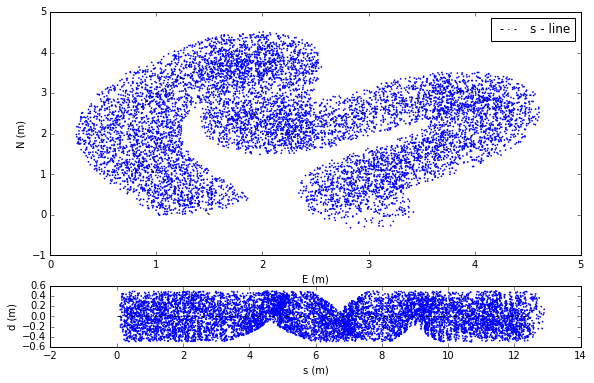

0:00:05.658160
##########################################################
# Discretization: 320 #####################################
Avarage interval between path points:
0.385885228825
bc calculated successfully
vbc calculated successfully
0:00:00.000021
 calculate_bp
0:00:00.048196
 calculate_vbp
0:00:00.782861
 calculate_pbc
0:00:01.427739
 calculate_pto
0:00:02.015444
 set_index_correlation
0:00:02.548651
 set_pto
0:00:02.589003
 set_position
0:00:02.845841
 set_d
0:00:02.891621
 set_s
0:00:02.990838


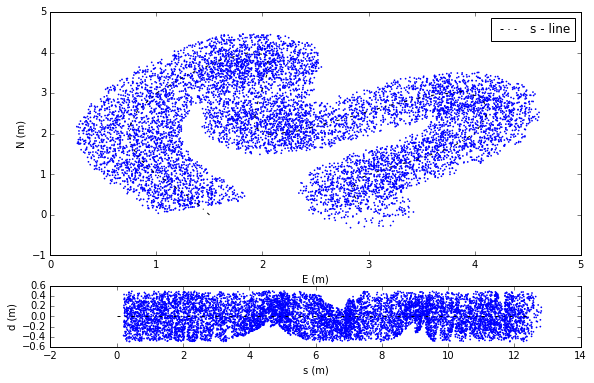

0:00:03.579258
##########################################################
# Discretization: 640 #####################################
Avarage interval between path points:
0.724926757161
bc calculated successfully
vbc calculated successfully
0:00:00.000016
 calculate_bp
0:00:00.038691
 calculate_vbp
0:00:00.407151
 calculate_pbc
0:00:00.749925
 calculate_pto
0:00:01.046832
 set_index_correlation
0:00:01.616230
 set_pto
0:00:01.661118
 set_position
0:00:01.905912
 set_d
0:00:01.943911
 set_s
0:00:02.041853


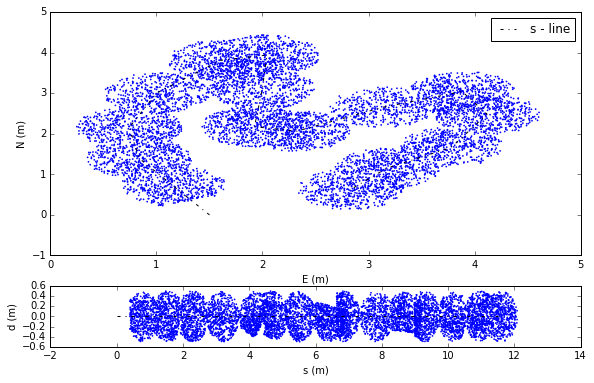

0:00:02.583584
##########################################################
# Discretization: 1280 #####################################
Avarage interval between path points:
1.28251261293
bc calculated successfully
vbc calculated successfully
0:00:00.000027
 calculate_bp
0:00:00.040508
 calculate_vbp
0:00:00.227755
 calculate_pbc
0:00:00.418486
 calculate_pto
0:00:00.577296
 set_index_correlation
0:00:01.080445
 set_pto
0:00:01.122193
 set_position
0:00:01.389031
 set_d
0:00:01.439681
 set_s
0:00:01.536477


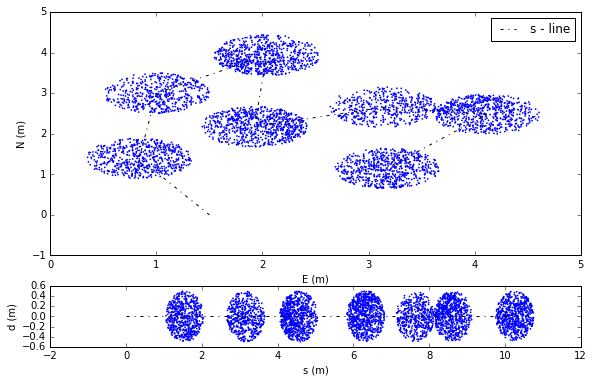

0:00:01.998815
##########################################################


In [42]:
discretizations = [5,10,20,40,80,160,320,640,1280]
percentages_transformed = []

for discretization in discretizations:
    print('# Discretization: '+ str(discretization) + ' #####################################')
    grid = zip(x1+random_x-0.5,y1+random_y-0.5)
    path = zip(x1[::discretization],y1[::discretization])
    percentage_transformed = execute_transformation(path, grid)
    #print('Percentage transformed:'+ str(percentage_transformed))
    percentages_transformed.append(percentage_transformed)
    print('##########################################################')

In [43]:
pt = []
for bg in percentages_transformed:
    pt.append(len(bg[bg.s.notnull()])/len(bg))

In [44]:
pt

[0.939, 0.9386, 0.9383, 0.9365, 0.9328, 0.9277, 0.9102, 0.8174, 0.4675]

In [51]:
discretizations

[5, 10, 20, 40, 80, 160, 320, 640, 1280]

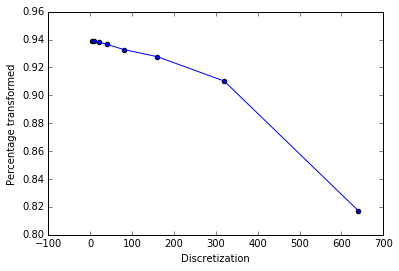

In [50]:
plt.plot(discretizations[:8],pt[:8])
plt.scatter(discretizations[:8],pt[:8])
plt.xlabel('Discretization')
plt.ylabel('Percentage transformed')

It is noticed that similar quality can be achieved with 5 and 80 discretizations. The time difference between the two can be significant. So discretization has to be carefully considered.  